In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.ndimage import gaussian_filter1d,median_filter,maximum_filter1d

In [2]:
index = pd.read_csv("Amino_Acid_PI_Hydro_index.csv")

In [3]:
min_max_scaler = MinMaxScaler()

In [4]:
index['normalized pl'] = min_max_scaler.fit_transform(index['pl'].values.reshape(-1,1))
index['normalized Hydrophobicity'] = min_max_scaler.fit_transform(index['Hydrohobic Index'].values.reshape(-1,1))

In [5]:
index.index = index['1-letter']

In [6]:
HSA = pd.read_csv("Albumin_alignments.csv")

In [7]:
def cal_diff(aa1,aa2,feature):
    if aa1 == '-' or aa2 =='-':
        return 0.5
    if aa1 == aa2:
        return 0
    diff = abs(index.loc[aa1][feature] - index.loc[aa2][feature])
    return diff

In [8]:
HSA['Diff pl'] = HSA[['sp|P02768|ALBU_HUMAN','XP_006188754.1 [Camelus ferus]']].apply(lambda x: cal_diff(x[0],x[1],'normalized pl'),1)
HSA['Diff Hydrophobicity'] = HSA[['sp|P02768|ALBU_HUMAN','XP_006188754.1 [Camelus ferus]']].apply(lambda x: cal_diff(x[0],x[1],'normalized Hydrophobicity'),1)
HSA['Diff Sum'] = HSA['Diff Hydrophobicity']+HSA['Diff pl']

In [9]:
HSA['pl'] = HSA['sp|P02768|ALBU_HUMAN'].apply(lambda x: index.loc[x]['normalized pl'])
HSA['hydro'] = HSA['sp|P02768|ALBU_HUMAN'].apply(lambda x: index.loc[x]['normalized Hydrophobicity'])

In [10]:
HSA = pd.read_csv("albumin.csv")

In [11]:
E1 = HSA[~HSA['E1'].isnull()]
E2 = HSA[~HSA['E2'].isnull()]
#E3 = HSA[~HSA['E3'].isnull()]
E4 = HSA[~HSA['E4'].isnull()]

In [12]:
HSA=HSA[:-1]

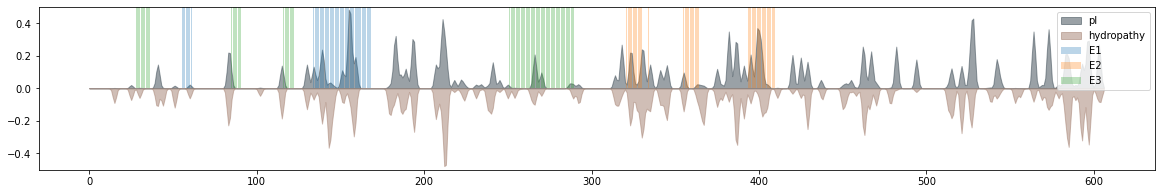

In [16]:
plt.figure(figsize=(20,3))
plt.fill_between(HSA['res num'].values,0,gaussian_filter1d(HSA['Diff pl'].values,1),alpha=0.5,label='pI',color='#36454f')
plt.fill_between(HSA['res num'].values,0,-1*gaussian_filter1d(HSA['Diff Hydrophobicity'].values,1),alpha=0.5,label='hydropathy',color='#A37F6F')
plt.bar(HSA['res num'].values,0.5*HSA['E1'].values,alpha=0.3,label='E1')
plt.bar(HSA['res num'].values,0.5*HSA['E2'].values,alpha=0.3,label='E2')
plt.bar(HSA['res num'].values,0.5*HSA['E4'].values,alpha=0.3,label='E3')
#plt.bar(HSA['res num'].values,0.5*HSA['E3'].values,alpha=0.3,label='E3')
plt.ylim((-0.5,0.5))
plt.legend()
#plt.savefig("HSA_Conservation_pl_Hydrophob.svg")